<a href="https://colab.research.google.com/github/ignadr/ML-Algorithms-Manual/blob/main/univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

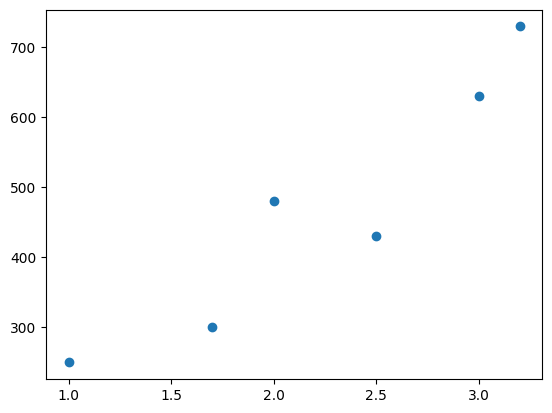

In [ ]:
plt.scatter(x_train, y_train)

In [ ]:
w = 200
b = 250
alpha = 0.3

In [ ]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples
      w,b (scalar)    : model parameters
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

In [ ]:
def compute_cost(x, y, w, b):
  # m is the amount of data
  m = x.shape[0]

  cost_sum = 0

  # Find the total cost using average squared error
  for i in range(m):
    f_wb = w * x[i] + b
    cost = (f_wb - y[i]) ** 2
    cost_sum = cost_sum + cost

  total_cost = (1 / (2 * m)) * cost_sum

  return total_cost

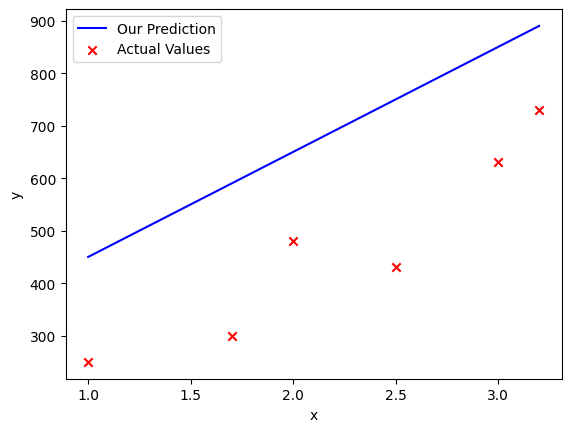

In [ ]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
# plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')
plt.legend()
plt.show()

## After using Gradient Descent

In [ ]:
def compute_gradient(x ,y, w, b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw = dj_dw + ((f_wb - y[i]) * x[i])
    dj_db = dj_db + (f_wb - y[i])

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [ ]:
dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)
print(f"dj_dw = {dj_dw}, dj_db = {dj_db}")

dj_dw = 500.8333333333333, dj_db = 226.66666666666666


In [ ]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iter, cost_function, gradient_function):
  J_hist = []
  w = w_init
  b = b_init

  for i in range(num_iter):
    dj_dw, dj_db = gradient_function(x, y, w, b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    J_hist.append(cost_function(x, y, w, b))

    if i % math.ceil(num_iter / 10) == 0:
      print(f"Iteration {i}, Cost: {J_hist[i]}, dj_dw: {dj_dw}, dj_db: {dj_db}, w: {w}, b: {b}")

  return w, b, J_hist

In [ ]:
w_final, b_final, J_hist = gradient_descent(x_train, y_train, w, b, alpha, 10000, compute_cost, compute_gradient)

Iteration 0, Cost: 24712.723854166663, dj_dw: 500.8333333333333, dj_db: 226.66666666666666, w: 49.75, b: 182.0
Iteration 1000, Cost: 1735.8832046332045, dj_dw: -1.427717203720628e-11, dj_db: 3.4897122228964385e-11, w: 209.36293436277845, b: 2.4227799231621656
Iteration 2000, Cost: 1735.883204633203, dj_dw: 6.158037043254202e-13, dj_db: 2.652692880171041e-13, w: 209.3629343629342, b: 2.4227799227800277
Iteration 3000, Cost: 1735.883204633203, dj_dw: 6.158037043254202e-13, dj_db: 2.652692880171041e-13, w: 209.3629343629342, b: 2.4227799227800277
Iteration 4000, Cost: 1735.883204633203, dj_dw: 6.158037043254202e-13, dj_db: 2.652692880171041e-13, w: 209.3629343629342, b: 2.4227799227800277
Iteration 5000, Cost: 1735.883204633203, dj_dw: 6.158037043254202e-13, dj_db: 2.652692880171041e-13, w: 209.3629343629342, b: 2.4227799227800277
Iteration 6000, Cost: 1735.883204633203, dj_dw: 6.158037043254202e-13, dj_db: 2.652692880171041e-13, w: 209.3629343629342, b: 2.4227799227800277
Iteration 7000,

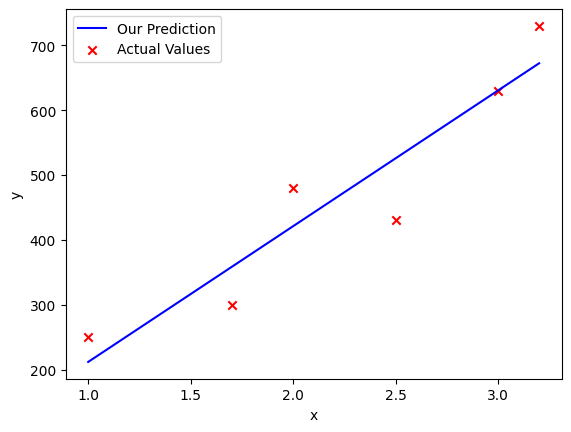

In [ ]:
tmp_f_wb = compute_model_output(x_train, w_final, b_final,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
# plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')
plt.legend()
plt.show()